In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

#Importing data
data =  pd.read_csv("movie_metadata.csv",index_col=None, sep=",")


### Exploration

In [2]:
data.sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
471,Color,Ivan Reitman,97.0,98.0,425.0,397.0,Anne Heche,11000.0,74329966.0,Action|Adventure|Comedy|Romance,...,164.0,English,USA,PG-13,70000000.0,1998.0,643.0,5.7,2.35,0
891,Color,Jim Gillespie,66.0,96.0,13.0,534.0,Tom Berenger,13000.0,NaN,Crime|Horror|Mystery|Thriller,...,142.0,English,USA,R,55000000.0,2002.0,854.0,5.3,2.35,448
3940,Color,Renny Harlin,68.0,102.0,212.0,195.0,Lane Smith,10000.0,354704.0,Crime|Drama|Horror|Thriller,...,38.0,English,USA,R,1300000.0,1987.0,633.0,5.9,1.85,314
2916,Color,William Friedkin,304.0,132.0,607.0,259.0,Linda Blair,1000.0,204565000.0,Horror,...,1058.0,English,USA,R,8000000.0,1973.0,931.0,8.0,1.37,18000
3654,Color,Barbet Schroeder,136.0,115.0,58.0,400.0,Chris Penn,33000.0,31874869.0,Crime|Mystery|Thriller,...,302.0,English,USA,R,50000000.0,2002.0,455.0,6.1,1.85,0
2907,Color,Lars von Trier,177.0,140.0,3000.0,322.0,Udo Kier,963.0,4157491.0,Crime|Drama|Musical,...,690.0,English,Denmark,R,12800000.0,2000.0,595.0,8.0,2.35,0
439,Color,Gary Ross,673.0,142.0,378.0,575.0,Josh Hutcherson,34000.0,407999255.0,Adventure|Drama|Sci-Fi|Thriller,...,1959.0,English,USA,PG-13,78000000.0,2012.0,14000.0,7.3,2.35,140000
3046,Color,Tobe Hooper,52.0,100.0,365.0,225.0,Bud Cort,425.0,4884663.0,Horror|Sci-Fi,...,64.0,English,USA,PG,12000000.0,1986.0,394.0,5.5,2.35,902
4426,Color,Adam Green,229.0,93.0,134.0,488.0,Kane Hodder,936.0,NaN,Comedy|Horror,...,235.0,English,USA,R,1500000.0,2006.0,935.0,5.7,1.85,0
1319,Color,D.J. Caruso,253.0,105.0,154.0,502.0,Aaron Yoo,884.0,80050171.0,Drama|Mystery|Thriller,...,491.0,English,USA,PG-13,20000000.0,2007.0,617.0,6.9,1.85,0


In [5]:
#Shape of our Dataset

print(data.shape)
data.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,637.5,148.0,131.0,11765.0,Rob Walker,131.0,260594660.5,Documentary,...,1719.5,NaN,NaN,NaN,256850000.0,2012.0,12.0,7.1,2.35,0


In [6]:
#Columns names and number of elements

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        5043 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

##### Missing values

In [4]:
#Number of missing values

data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [2]:
#Using interpolate function to fill missing values in non categorical columns

data= data.interpolate()

In [32]:
data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

##### Duplicates

In [18]:
data.movie_title.value_counts().sample(10)

Pitch Perfect 2                     1
Two Lovers                          1
Star Trek IV: The Voyage Home       1
Veer-Zaara                          1
Pride and Glory                     1
American Sniper                     1
The Young Unknowns                  1
Transformers: Age of Extinction     1
Austin Powers in Goldmember         1
Light It Up                         1
Name: movie_title, dtype: int64

In [3]:
#Drop duplicates movies 

data_1 = data.drop_duplicates(subset ='movie_title',  keep = False, inplace = False) 
data_1.shape

(4798, 28)

##### Ratings

In [11]:
#Quick view on the ratings

ratings = pd.DataFrame(data_1.groupby('movie_title')['imdb_score'].mean())  
ratings.sample(10)

,imdb_score
movie_title,
A Man Apart,6.1
Now You See Me 2,6.9
Heaven's Gate,6.8
Stiff Upper Lips,6.4
Ronin,7.3
Gone in Sixty Seconds,6.5
The Benchwarmers,5.6
What to Expect When You're Expecting,5.7
Catch-22,7.2


In [12]:
#Sorting movies according to their imdb scores

ratings.sort_values('imdb_score', ascending = False).head(10) 

,imdb_score
movie_title,
Towering Inferno,9.5
The Shawshank Redemption,9.3
The Godfather,9.2
Kickboxer: Vengeance,9.1
The Godfather: Part II,9.0
The Dark Knight,9.0
Fargo,9.0
Pulp Fiction,8.9
The Lord of the Rings: The Return of the King,8.9


In [13]:
#Mean of Imdb ratings

ratings.imdb_score.mean()

6.4333055439766476

In [4]:
#We won't recommend a movie with really bad ratings, therefore we drop all movies with a rating less than 5.

data_2 = data_1[data_1.imdb_score >5]
print(data_2.shape)
data_2.sample(10)

(4288, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4970,Color,Jason Miller,5.0,77.0,0.0,0.0,Dottie Alexander,45.0,2.805560e+07,Biography|Documentary|Music,...,1.0,English,USA,Unrated,100000.0,2014.0,0.0,7.6,1.78,82
3116,Color,Michael Schultz,55.0,109.0,78.0,619.0,Vanity,854.0,3.300000e+07,Action|Comedy|Drama|Music,...,109.0,English,USA,PG-13,10000000.0,1985.0,841.0,6.9,1.85,0
4978,Color,Brandon Trost,66.0,82.0,32.0,128.0,Sean Whalen,968.0,4.055700e+04,Comedy,...,22.0,English,USA,R,60000.0,2011.0,407.0,5.6,2.35,0
4073,Color,John Maclean,246.0,84.0,85.0,748.0,Kodi Smit-McPhee,13000.0,2.290940e+05,Western,...,88.0,English,UK,R,3000000.0,2015.0,884.0,6.9,1.66,0
3354,Color,Serdar Akar,16.0,122.0,11.0,173.0,Bergüzar Korel,205.0,5.403512e+07,Action|Adventure,...,159.0,Arabic,Turkey,NaN,8300000.0,2006.0,197.0,6.0,1.85,467
4947,Color,Lynn Shelton,171.0,90.0,100.0,9.0,Mike Birbiglia,830.0,1.573712e+06,Comedy|Drama,...,62.0,English,USA,R,125000.0,2011.0,128.0,6.7,1.70,3000
274,Color,Alex Proyas,225.0,115.0,295.0,466.0,Bruce Greenwood,10000.0,1.447954e+08,Action|Mystery|Sci-Fi|Thriller,...,789.0,English,USA,PG-13,120000000.0,2004.0,981.0,7.1,2.35,0
326,Color,Martin Scorsese,233.0,216.0,17000.0,1000.0,Liam Neeson,29000.0,7.767964e+07,Crime|Drama,...,1166.0,English,USA,R,100000000.0,2002.0,14000.0,7.5,2.35,0
3086,Color,Christopher Cain,43.0,111.0,58.0,258.0,Taylor Handley,482.0,1.066555e+06,Drama|History|Romance|Western,...,111.0,NaN,USA,R,11000000.0,2007.0,362.0,5.8,1.85,411
3003,Color,Lawrence Kasdan,57.0,103.0,759.0,820.0,Mark Duplass,967.0,7.933520e+05,Comedy|Drama|Romance,...,25.0,English,USA,PG-13,10000000.0,2012.0,830.0,5.1,2.35,0


##### Outliers

In [6]:
#We drop several columns :
#All columns related to facebook likes since these won't concern old movies
#Budget and gross 
#Country
#Aspect ratio
#movie imdb link


print(data_2.columns)
data_3 = data_2[['director_name','num_critic_for_reviews','actor_2_name','genres','actor_1_name','movie_title','actor_3_name',
             'plot_keywords','num_user_for_reviews','imdb_score','duration','title_year', 'language']]

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [9]:
#maximum duration of movie in our Dataset

max(data_3.duration)

511.0

In [7]:
# A movie is between 1h and 4h 
data_4 = data_3[(data_3.duration<240) & (data_3.duration >60)]
data_4.shape


(4170, 13)

In [20]:
#Oldest movie

min(data_4.title_year)

1916.0

##### Number of reviews by critics and user

In [23]:
#Number of reviews for critics and users

review = pd.DataFrame(movie.groupby('movie_title')['num_critic_for_reviews'].mean())  
review['num_user'] = pd.DataFrame(movie.groupby('movie_title')['num_user_for_reviews'].mean())
review.columns = ['num_critics' if x=='num_critic_for_reviews' else x for x in review.columns]
review.sample(10)

,num_critics,num_user
movie_title,,
The Squid and the Whale,110.0,232.0
Case 39,167.0,174.0
Four Rooms,51.0,177.0
The Dark Knight,645.0,4667.0
Army of Darkness,221.0,604.0
Piranha 3D,365.0,374.0
Casper,26.0,92.0
About Last Night,90.0,42.0
Shalako,10.0,41.0


In [42]:
print('max num critics :',max(review.num_critics))
print('min num critics :',min(review.num_critics))
print('mean num critics :', review.num_critics.mean())
print('max num user :',max(review.num_user))
print('min num user :',min(review.num_user))
print('mean num user :', review.num_user.mean())

max num critics : 813.0
min num critics : 1.0
mean num critics : 149.45478131949594
max num user : 5060.0
min num user : 1.0
mean num user : 288.7624166048925


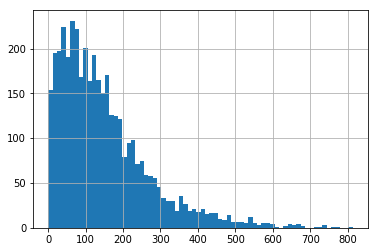

In [43]:
review['num_critics'].hist(bins =70)

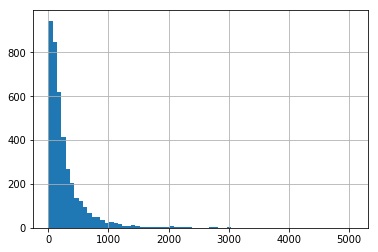

In [44]:
review['num_user'].hist(bins =70)

In [8]:
data_5 = data_4[data_4.num_user_for_reviews >100]

In [9]:
#Removing all missing values since they represents less than 2% of our dataset

movie = data_5.dropna()
movie.to_csv('movie', sep='\t', encoding='utf-8')
movie

,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,num_user_for_reviews,imdb_score,duration,title_year,language
0,James Cameron,723.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,7.9,178.0,2009.0,English
1,Gore Verbinski,302.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,1238.0,7.1,169.0,2007.0,English
2,Sam Mendes,602.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,994.0,6.8,148.0,2015.0,English
3,Christopher Nolan,813.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2701.0,8.5,164.0,2012.0,English
5,Andrew Stanton,462.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,738.0,6.6,132.0,2012.0,English
7,Nathan Greno,324.0,Donna Murphy,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,M.C. Gainey,17th century|based on fairy tale|disney|flower...,387.0,7.8,100.0,2010.0,English
8,Joss Whedon,635.0,Robert Downey Jr.,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,Scarlett Johansson,artificial intelligence|based on comic book|ca...,1117.0,7.5,141.0,2015.0,English
9,David Yates,375.0,Daniel Radcliffe,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,Rupert Grint,blood|book|love|potion|professor,973.0,7.5,153.0,2009.0,English
10,Zack Snyder,673.0,Lauren Cohan,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,Alan D. Purwin,based on comic book|batman|sequel to a reboot|...,3018.0,6.9,183.0,2016.0,English
11,Bryan Singer,434.0,Marlon Brando,Action|Adventure|Sci-Fi,Kevin Spacey,Superman Returns,Frank Langella,crystal|epic|lex luthor|lois lane|return to earth,2367.0,6.1,169.0,2006.0,English


##### Genres

In [24]:
# Movie genre

genre=list(movie['genres'].str.split('|', expand=True).stack().unique())
genre

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Musical',
 'Romance',
 'Mystery',
 'Western',
 'Drama',
 'History',
 'Sport',
 'Crime',
 'Horror',
 'War',
 'Biography',
 'Music',
 'Documentary',
 'News',
 'Film-Noir']

In [46]:
movie.genres.value_counts().sample(10)


Comedy|Crime|Drama                                  21
Action|Adventure|Horror|Sci-Fi|Thriller              1
Action|Adventure|Comedy|Sci-Fi|Thriller              1
Comedy|Crime|Horror|Thriller                         1
Adventure|Comedy|Family|Romance                      2
Comedy|Crime|Musical|Romance                         1
Action|Adventure|Comedy|Romance|Thriller|Western     1
Adventure|Drama|Romance|War                          5
Action|Animation|Crime|Sci-Fi|Thriller               1
Action|Comedy|Horror                                 3
Name: genres, dtype: int64

##### Directors 

In [16]:
director =list(movie['director_name'].str.split('|', expand=True).stack().unique())
movie.director_name.value_counts().sample(10)

Pete Travis              1
Hans Petter Moland       1
Rob Cohen                6
Carl Rinsch              1
Craig Bolotin            1
Brian Koppelman          2
Eric Leighton            1
Jonas Åkerlund           2
John Crowley             1
Aleksandr Veledinskiy    1
Name: director_name, dtype: int64

##### Multivariate analysis

In [40]:
categorical = movie[['director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name',
             'plot_keywords']]

numerical = movie[['num_critic_for_reviews','num_user_for_reviews','imdb_score','duration','title_year']]
categorical_features = ['director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name',
             'plot_keywords']

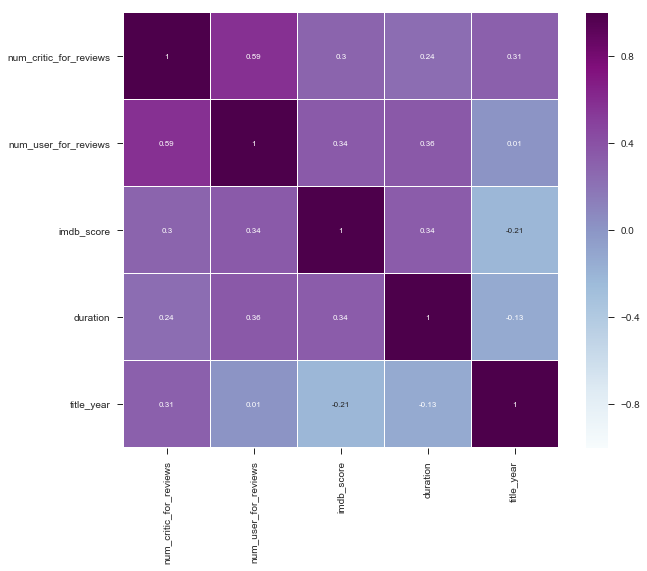

In [24]:
sns.set(style="ticks", color_codes=True)
corr = numerical.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, 
            cmap='BuPu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [56]:
movie.sample(10)

,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,num_user_for_reviews,imdb_score,duration,title_year
914,Phyllida Lloyd,238.0,Meryl Streep,Comedy|Family|Musical|Romance,Colin Firth,Mamma Mia!,Julie Walters,bride|greece|island|mediterranean|wedding,611.0,6.3,108.0,2008.0
3221,Jon Stewart,129.0,Claire Foy,Biography|Drama,Numan Acar,Rosewater,Haluk Bilginer,based on true story|hijab|journalism|prison|re...,37.0,6.6,103.0,2014.0
2468,Lance Hool,10.0,Joaquim de Almeida,Action|Drama|History|Romance|War|Western,Tom Berenger,One Man's Hero,Mark Moses,american|battalion|catholic|mexican|sergeant,42.0,6.2,121.0,1999.0
4621,Stefan C. Schaefer,21.0,Marlene Forte,Comedy|Drama|Romance,Nicole Beharie,My Last Day Without You,Reg E. Cathey,business trip|german|love|new york|singer song...,12.0,5.7,90.0,2011.0
1859,Bob Rafelson,42.0,Mike Starr,Crime|Drama|Thriller,Harold Perrineau,Blood and Wine,Judy Davis,diamond|necklace|safecracker|wine|wine dealer,55.0,6.1,101.0,1996.0
1025,William Friedkin,50.0,Chazz Palminteri,Crime|Drama|Thriller,Michael Biehn,Jade,Linda Fiorentino,blackmail|investigation|murder|panties pulled ...,70.0,5.1,107.0,1995.0
1586,Dennis Dugan,112.0,Adam Sandler,Comedy|Drama,Steve Buscemi,Big Daddy,Joey Lauren Adams,homosexual|law|law school|responsibility|vomiting,289.0,6.4,93.0,1999.0
2819,Ang Lee,357.0,Heath Ledger,Drama|Romance,Jake Gyllenhaal,Brokeback Mountain,Anne Hathaway,gay relationship|homosexuality|mountain|ranch|...,2254.0,7.7,134.0,2005.0
52,Guillermo del Toro,575.0,Clifton Collins Jr.,Action|Adventure|Sci-Fi,Charlie Hunnam,Pacific Rim,Larry Joe Campbell,giant monster|kaiju|pilot|portal|robot,1106.0,7.0,131.0,2013.0
1544,Jared Hess,163.0,Moises Arias,Comedy|Family|Sport,Ana de la Reguera,Nacho Libre,Héctor Jiménez,lucha libre|monastery|nun|orphan|wrestling,441.0,5.7,92.0,2006.0
